## Introduction
Critical Role is a live action role playing game where some amazing voice actors come together to play some Dungeon and Dragons. This analysis aims to extract data from the transcripts produced for their YouTube channel’s subtitles. While there are inherent errors that come with transcriptions from the videos such as typos and inconsistent verbiage. However, the goal of this study is to get a wholistic understanding of the cast’s line distribution, differences from campaign 1 and 2, and general sentimental patterns (using pre-generated sentiment analysis library from TextBlob). The analysis of this report is split into:

1. Downloading subtitles from Critical Role playlist using youtube-dl
2. Open vtt formatted subtitles and process to readable format
3. Clean vtt to denote continuous lines and time stamps as dataframe
4. Create pipeline to process vtt for each episode in both campaigns
5. Aggregate data per cast member, episode, or campaign
6. Visualize data by pivoting through different aggregated formats

All functions used are listed in the **pkg_vtt_extract** folder which follow a similar format to the above steps.

In [2]:
import pandas as pd
import pkg_vtt_extract as vtt

%load_ext autoreload
%autoreload 2

## Downloading Subtitles
The below commands are derived from [youtube-dl](https://github.com/ytdl-org/youtube-dl) which is used to download videos from YouTube or other video platforms. Specially, the commands are run in the console and automatically download the subtitles from the playlist into vtt format.
This command can be run to retrieve the files as needed

In [3]:
#youtube-dl -i -o "C:\Users\alche\Documents\Projects\Critical-Role-Transcript\data_raw\C2_vtt%(title)s.%(ext)s" --default-search "ytsearch" --convert-subs srt --write-sub --skip-download --yes-playlist "https://www.youtube.com/watch?v=byva0hOj8CU&list=PL1tiwbzkOjQxD0jjAE7PsWoaCrs0EkBH2&index=2&t=0s"

#youtube-dl -i -o "C:\Users\alche\Documents\Projects\Critical-Role-Transcript\data_raw\C1_vtt\%(title)s.%(ext)s" --default-search "ytsearch" --convert-subs srt --write-sub --skip-download --yes-playlist "https://www.youtube.com/watch?v=i-p9lWIhcLQ&list=PL7atuZxmT954bCkC062rKwXTvJtcqFB8i&index=2&t=0s"

## Cleaning vtt Formatting
### Formatting vtt

The subtitle format vtt contains information on time length of the subtitle and the words said during the time span. This time stamps are in a standard HH:MM:SS.SSS time format and separated with an arrow while the words below are separated into one or two lines.

### Combining Two-part Episodes

Some episodes in the first campaign are split into two episodes and therefore must be combined. A function was made for this.

### Standardizing Episode Names

The files names for each episode was extracted from the original titles. Each episode was typically formatted with the “Title … Critical Roles … Episode X” but sometimes in different permutations. Also, some of the episodes in the playlist are one-shots that are not part of the main story line. Therefore, just the episodes with an number needed to be extracted so a function was made to rename all relevant ones.


In [3]:
with open("data_raw/C1_vtt/C1_1.vtt", "r", encoding="latin-1") as ep_raw:
    ep_raw = ep_raw.read().splitlines()
    count = 0
    for line in ep_raw:
        if count < 20:
            print (line)
            count += 1
        else:
            break

WEBVTT
Kind: captions
Language: en

00:00:00.314 --> 00:00:04.420
MATT: Hello everyone. My name is Matthew Mercer,
voice actor and Dungeon Master for Critical Role

00:00:04.420 --> 00:00:08.768
on Geek &amp; Sundry, where I take a bunch of other
voice actors and run them through a fantastical

00:00:08.768 --> 00:00:13.387
fantasy adventure through the world of Dungeons &amp;
Dragons. We play every Thursday at 7:00pm Pacific

00:00:13.387 --> 00:00:16.685
Standard Time on Geek &amp; Sundry's Twitch stream.
Please come watch us live if you have the



In [ ]:
vtt.combine_two_part_ep('C1', 'Denouement _ Critical Role RPG Show Episode 35, pt. 1.en.vtt', 
    'Denouement _ Critical Role RPG Show Episode 35, pt. 2.en.vtt', 35)

vtt.combine_two_part_ep('C1', 'Gunpowder Plot, pt. 1  _ Critical Role RPG Show Episode 31.en.vtt', 
    'Gunpowder Plot, pt. 2  _ Critical Role RPG Show Episode 31.en.vtt', 31)

vtt.combine_two_part_ep('C1', 'Reunions _ Critical Role RPG Show Episode 33, pt. 1.en.vtt', 
    'Reunions _ Critical Role RPG Show Episode 33, pt. 2.en.vtt', 33)

In [2]:
vtt.rename_vtt('C1')
vtt.rename_vtt('C2')

## Creating Dataframe from vtt
From the vtt, the main variables to extract are the name of the person talking, the time stamp from when they start and stop talking, and what is said during that time.

Fortunately, these subtitles were originally sourced by fans of the show and contain notations of who’s speaking, typically with “NAME:” and later outsourced to professional. This allows each cast’s speaking time to be noted.

After function was created to extract all lines by separating each by lines with “ : ” and therefore allowing for continuous lines. Approximately 97% of the lines properly extracted (estimated by percent of unassigned names) were associated with a known cast member, so while it has room for error, there the method is sufficient.

Each line with timestamps was extracted with **vtt.episode_extract** which parsed through the selected episodes to exported all lines into a dataframe with episodes noted as seen in **C1_processed_vtt**.

Finally, the total time each line was spoken was calculated and each name found through the " : " separation was associated with a cast or guest member with **vtt,org_time_person**, with results seen in **C1_org_name**

In [3]:
C1_processed_vtt_df = vtt.episode_extract('C1', 1, 115)
C1_processed_vtt_df.to_csv('data_output/C1_processed_vtt_df.csv')

Completed: ep 10 (1.02 min)
Completed: ep 20 (0.54 min)
Completed: ep 30 (0.45 min)
Completed: ep 40 (0.5 min)
Completed: ep 50 (0.5 min)
Completed: ep 60 (0.55 min)
Completed: ep 70 (0.47 min)
Completed: ep 80 (0.84 min)
Completed: ep 90 (1.59 min)
Completed: ep 100 (0.69 min)
Completed: ep 110 (0.45 min)
Completed: all


In [2]:
C1_processed_vtt = pd.read_csv('data_output/C1_processed_vtt_df.csv')
C1_processed_vtt.head()

,Unnamed: 0,start_time,end_time,name,speech,count,episode
0,0,00:00:00.314,00:00:13.387,matt,"hello everyone. my name is matthew mercer, voi...",31,1
1,1,00:00:24.239,00:01:09.809,matt,"welcome to first episode of critical role, and...",167,1
2,2,00:01:09.809,00:01:29.671,travis,"right, listen up! if you have ale, then you ha...",39,1
3,3,00:01:30.632,00:02:57.286,travis,"wait. easily the brains of the group, grog is ...",180,1
4,4,00:02:57.286,00:03:13.178,marisha,a first impression of keyleth would leave you ...,44,1


In [3]:
C1_org_name = vtt.org_time_person(C1_processed_vtt, 'C1')
C1_org_name.to_csv('data_output/C1_org_name.csv')
C1_org_name.head()

,name,speech,count,episode,total_time,start_time,end_time,person,campaign
10,laura,"like so many half-elves, vexahlia has spent mo...",211,1,85.730,663.958,749.688,laura,1
25,laura,"hi. im laura bailey. im also, you know, a voic...",14,1,6.468,948.472,954.940,laura,1
27,laura,im playing vexahlia. the coolest chick ever.,7,1,3.056,956.792,959.848,laura,1
29,laura,"the ranger with the bear named trinket, in cas...",20,1,4.190,962.693,966.883,laura,1
56,laura,oh no.,2,1,0.652,1202.212,1202.864,laura,1


## Transcript Analysis
### Aggregating Cast and Episodes
To analyze episode by episode trends, each episode was grouped by each cast member to visualize each cast member’s total time airtime across each episode as seen in **C1_count_ep** produced by **vtt.group_by_person_episode**. This trend can be visualized using **vtt.lineplot_per_ep** where total second spoken across all episodes can be tracked. Furthermore, to better compare each cast member against one another, **vtt.densityplot_time_per_ep2** shows the frequency of second spoken during an episode as a density plot.

### Sentiment Analysis
TextBlob conveniently has a premade library for polarity and subjectivity analysis derived from a labeled movie review database. While it does not translate fully with the spoken language used in this media, it can give a general idea of how each cast member compares. Polarity ranges from -1 (negative) to 1 (positive) while subjectivity ranges from 0 (factual) to 1 (subjective).

The speech for each cast was grouped into a single paragraph for each episode and the subjectivity and polarity was extracted for each by **vtt.sentiment_per_person_and_episode**. The distribution of polarity and sentiment can be visualized from **vtt.density_subjectivity2**.

In [4]:
C1_group_person_ep = vtt.group_by_person_episode(C1_org_name)
C1_count_ep = vtt.count_per_episode(C1_group_person_ep)
C1_count_ep.head()

,person,episode,word_count,line_count,time_count,cont_line_count,cont_word_count,cont_time_count
0,ashley,1,0,0,0.000,0,0,0.000
1,ashley,2,0,0,0.000,0,0,0.000
2,ashley,3,0,0,0.000,0,0,0.000
3,ashley,4,2000,248,759.153,248,2000,759.153
4,ashley,5,1366,255,495.454,503,3366,1254.607


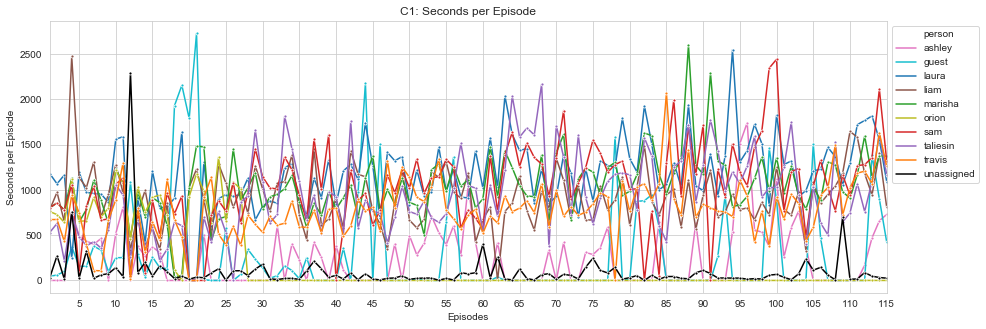

In [5]:
vtt.lineplot_per_ep(C1_org_name, 'nomatt', 'C1')

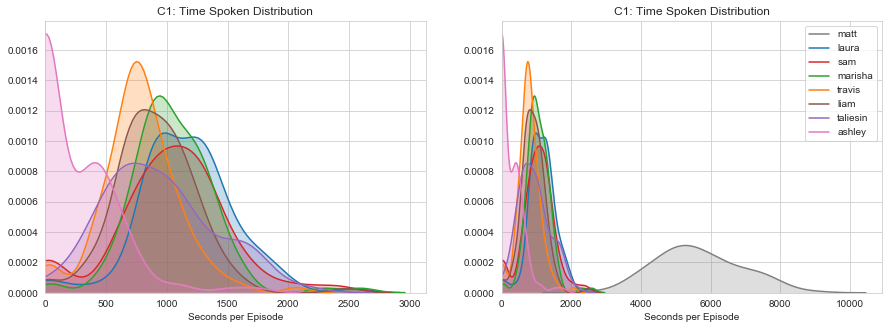

In [6]:
vtt.densityplot_time_per_ep2(C1_org_name, 'C1')

In [7]:
C1_sentiment = vtt.sentiment_per_person_and_episode(C1_org_name)
C1_sentiment.to_csv('data_output/C1_sentiment.csv')
C1_sentiment.head()

,episode,person,speech,Subjectivity,Polarity
0,1,guest,"just so you know, were having an audio bottlen...",0.411111,0.103333
1,1,laura,"like so many half-elves, vexahlia has spent mo...",0.533649,0.180760
2,1,liam,never entirely welcome in the company of elves...,0.511508,0.115379
3,1,marisha,a first impression of keyleth would leave you ...,0.575266,0.144104
4,1,matt,"hello everyone. my name is matthew mercer, voi...",0.444532,0.068142


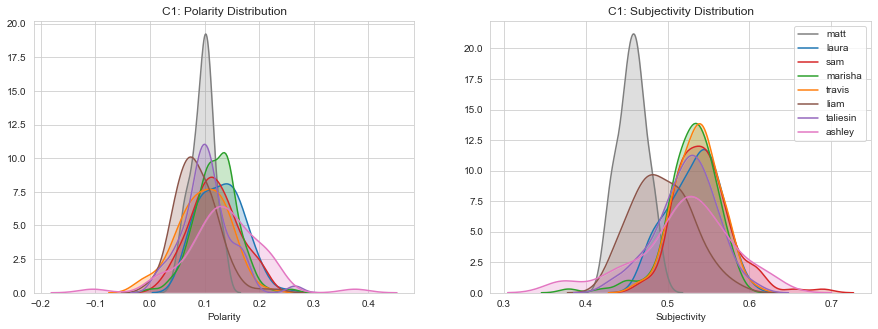

In [8]:
vtt.density_subjectivity2(C1_sentiment, 'C1')

## Campaign 2 Analysis
The sample functions are transferable to campaign two and can be compared below using the same visualizations.

In [12]:
C2_processed_vtt_df = vtt.episode_extract('C2', 1, 90)
C2_processed_vtt_df.to_csv('data_output/C2_processed_vtt_df.csv')

Completed: ep 10 (0.56 min)
Completed: ep 20 (0.6 min)
Completed: ep 30 (0.63 min)
Completed: ep 40 (0.55 min)
Completed: ep 50 (0.64 min)
Completed: ep 60 (1.68 min)
Completed: ep 70 (4.45 min)
Completed: ep 80 (3.76 min)
Completed: ep 90 (3.66 min)
Completed: all


In [11]:
C2_processed_vtt = pd.read_csv('data_output/C2_processed_vtt_df.csv')
C2_org_name = vtt.org_time_person(C2_processed_vtt, 'C2')
C2_org_name.to_csv('data_output/C2_org_name.csv')

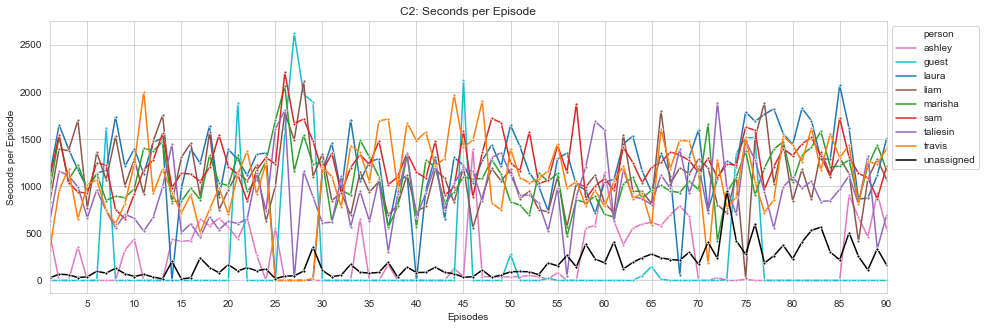

In [12]:
vtt.lineplot_per_ep(C2_org_name, 'nomatt', 'C2')

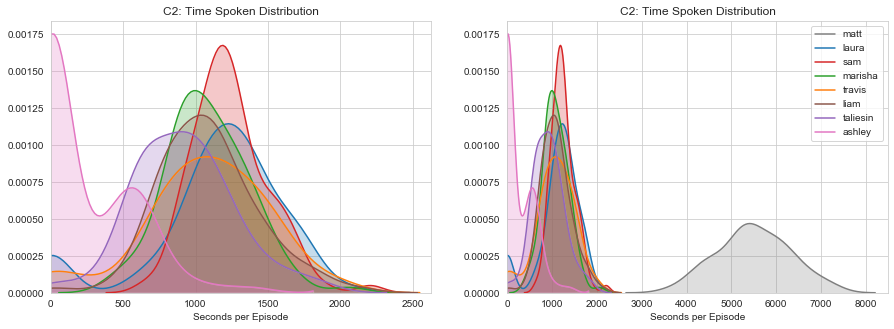

In [13]:
vtt.densityplot_time_per_ep2(C2_org_name, 'C2')

In [14]:
C2_sentiment = vtt.sentiment_per_person_and_episode(C2_org_name)
C2_sentiment.to_csv('data_output/C2_sentiment.csv')

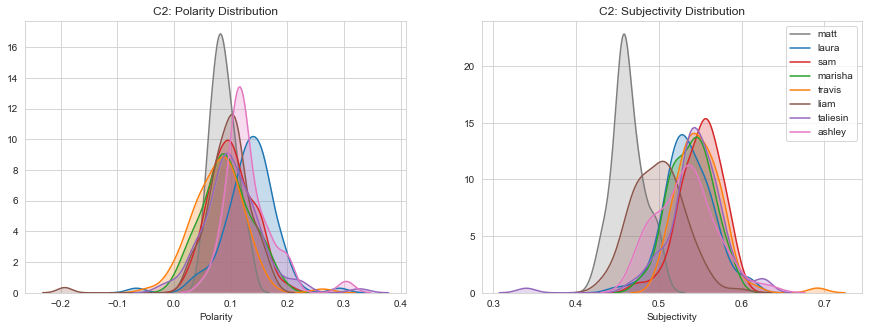

In [15]:
vtt.density_subjectivity2(C2_sentiment, 'C2')

## Conclusion
There are some interesting trends observed throughout this analysis. While there are inherent errors within each, it can be observed that some cast members have varying talking time. For example, Ashley, while out for many episodes due to filming conflicts, still spoke significantly less than other cast members even when present. Also, realizing how much Matt must speak per episode is illuminating to the world building and number characters he portrays.

Further analysis using hypothesis testing could be completed to observe if there is a statistically significant difference in mean talking time per episode for each cast member, but it seems like the distribution of time spoken is not normally distributed.

Overall, the project gave a general idea of the cast’s speaking tendencies which can be visualized. Some interesting projects that could follow up with this could be:

- Creating model to classify lines for each cast member to be able to predict who’s most likely to say a line
- Clustering using k-mean with TF-IDF to see how similarly and differently each cast member speaks
